# Health Data Analysis

In [2]:
# import Libraries

# Data Analysis and wrangling
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm

# choosing color palette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

In [3]:
# load data into dataframe
data = pd.read_excel(r"C:\Users\PC\Desktop\Oluwatobi\Data Analytics Project\Python'\Health Data\Health data.xlsx")
data.head()

,ID,Gender,Height,Weight,MH,ExerciseReg,vo2max
0,18,1,1.62,43.27,37.48,1,48.33
1,16,1,1.62,43.72,32.86,1,52.32
2,57,2,1.56,41.73,43.58,1,46.31
3,8,1,1.62,47.28,38.65,1,56.60
4,61,2,1.52,42.04,38.26,1,52.08


## Exploratory Data Analysis

### Data Overview

In [6]:
data.shape

(100, 7)

- The dataset has 100 rows and 7 columns

In [8]:
# check basic dataset information(datatype, non-null count)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           100 non-null    int64  
 1   Gender       100 non-null    int64  
 2   Height       100 non-null    float64
 3   Weight       100 non-null    float64
 4   MH           100 non-null    float64
 5   ExerciseReg  100 non-null    int64  
 6   vo2max       100 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 5.6 KB


- there are no null values

In [10]:
# check for duplicates
data.duplicated().sum()

0

- there are no duplicate entries

### Data Cleaning

In [13]:
#replace 1 with Male and 2 with Female in the Gender Column
data['Gender'] = data['Gender'].replace({1: 'Male', 2:'Female'})

In [14]:
data.head()

,ID,Gender,Height,Weight,MH,ExerciseReg,vo2max
0,18,Male,1.62,43.27,37.48,1,48.33
1,16,Male,1.62,43.72,32.86,1,52.32
2,57,Female,1.56,41.73,43.58,1,46.31
3,8,Male,1.62,47.28,38.65,1,56.60
4,61,Female,1.52,42.04,38.26,1,52.08


In [15]:
#replace 1 with Exercise Regularly and 0 with Doesnt Exercise Regularly in the ExerciseReg Column
data['ExerciseReg'] = data['ExerciseReg'].replace({1: 'Exercise Regularly', 0:'Doesnt Exercise Regularly' })

In [16]:
data.head()

,ID,Gender,Height,Weight,MH,ExerciseReg,vo2max
0,18,Male,1.62,43.27,37.48,Exercise Regularly,48.33
1,16,Male,1.62,43.72,32.86,Exercise Regularly,52.32
2,57,Female,1.56,41.73,43.58,Exercise Regularly,46.31
3,8,Male,1.62,47.28,38.65,Exercise Regularly,56.60
4,61,Female,1.52,42.04,38.26,Exercise Regularly,52.08


### Univariate Descriptive Analysis

In [18]:
# descriptive analysis of numerical columns
data.describe()

,ID,Height,Weight,MH,vo2max
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,478.080000,1.684200,78.111900,40.854500,48.124200
std,290.240189,0.102032,20.166333,7.438036,6.908733
min,1.000000,1.380000,41.730000,22.830000,32.170000
25%,232.750000,1.620000,63.150000,36.010000,44.077500
50%,450.500000,1.690000,76.355000,40.385000,48.370000
75%,729.250000,1.760000,89.767500,46.270000,53.227500
max,998.000000,1.900000,143.750000,60.000000,64.550000


In [19]:
# descriptive analysis of categorical columns: Gender
data['Gender'].value_counts()

Gender
Male      54
Female    46
Name: count, dtype: int64

In [20]:
# descriptive analysis of categorical columns: ExerciseReg
data['ExerciseReg'].value_counts()

ExerciseReg
Doesnt Exercise Regularly    51
Exercise Regularly           49
Name: count, dtype: int64

### Bivariate Descriptive Analysis

In [22]:
# Height by Gender
data.groupby(['Gender']).agg(
    mean_height = ('Height','mean'),
    std = ('Height','std')
)

,mean_height,std
Gender,,
Female,1.610435,0.083212
Male,1.747037,0.069435


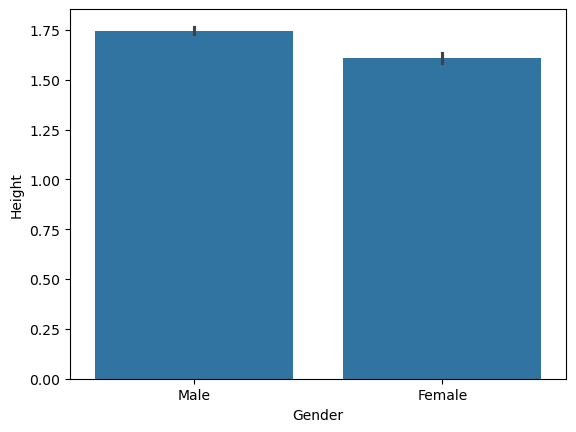

In [23]:
# Height by Gender barchart
sns.barplot(x = 'Gender', y = 'Height', data = data, estimator=np.mean)
plt.show()

In [24]:
# Weight by Gender
data.groupby(['Gender']).agg(
    mean_weight = ('Weight','mean'),
    std = ('Weight','std')
)

,mean_weight,std
Gender,,
Female,70.982174,14.001629
Male,84.185370,22.616219


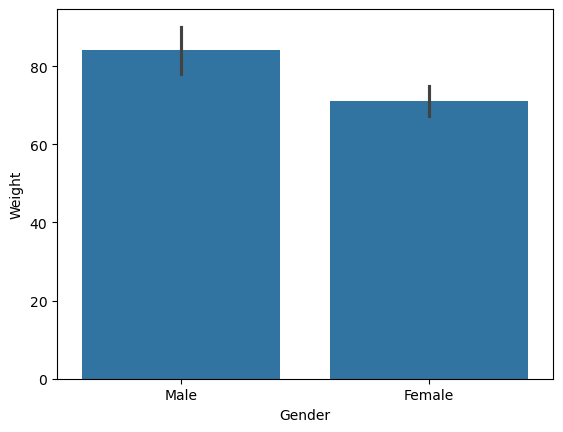

In [25]:
# Weight by Gender barchart
sns.barplot(x = 'Gender', y = 'Weight', data = data, estimator = np.mean)
plt.show()

In [26]:
# Mental health score by Gender
data.groupby(['Gender']).agg(
    mean_MHS = ('MH','mean'),
    std = ('MH','std')
)

,mean_MHS,std
Gender,,
Female,46.150217,5.608928
Male,36.343333,5.617400


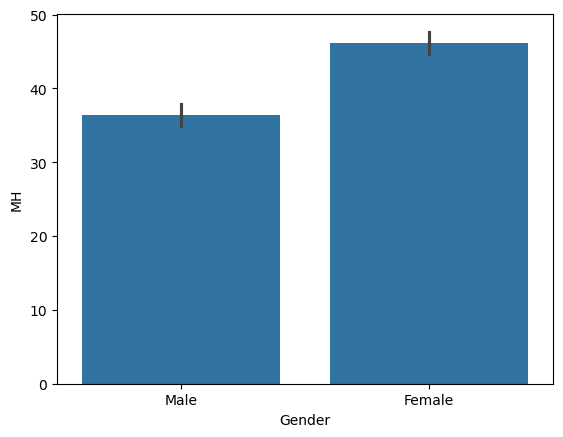

In [27]:
# Mental health score by Gender barchart
sns.barplot(x = 'Gender', y = 'MH', data = data, estimator = np.mean)
plt.show()

In [28]:
# Physical Health Score by Gender
data.groupby(['Gender']).agg(
    mean_PHS = ('vo2max','mean'),
    std = ('vo2max','std')
)

,mean_PHS,std
Gender,,
Female,48.176957,6.776065
Male,48.079259,7.082951


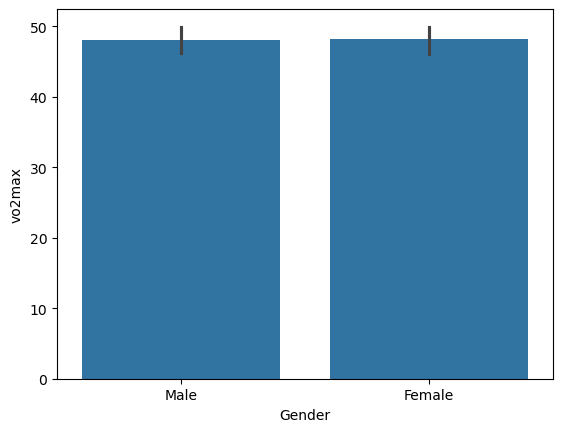

In [29]:
# Physical Health Score by Gender barchart
sns.barplot(x = 'Gender', y = 'vo2max', data = data, estimator = np.mean )
plt.show()

In [30]:
# Physical Health Score by Exercise status
data.groupby(['ExerciseReg']).agg(
    mean_PHS = ('vo2max','mean'),
    std = ('vo2max','std')
)

,mean_PHS,std
ExerciseReg,,
Doesnt Exercise Regularly,47.377255,7.845738
Exercise Regularly,48.901633,5.754488


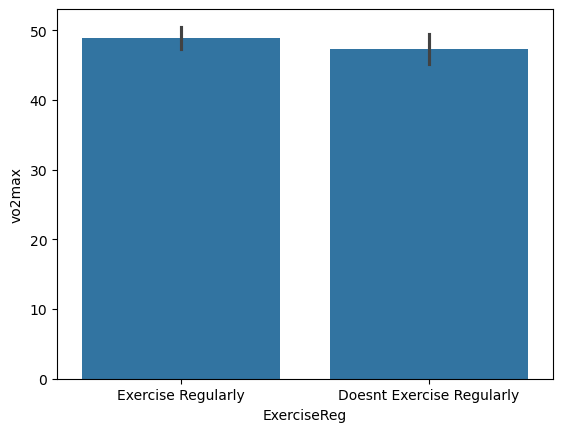

In [31]:
# Physical Health Score by Exercise status barchart
sns.barplot(x = 'ExerciseReg', y = 'vo2max', data = data, estimator = np.mean)
plt.show()

In [32]:
# Mental Health Score by Exercise status
data.groupby(['ExerciseReg']).agg(
    mean_MHS = ('MH','mean'),
    std = ('MH','std')
)

,mean_MHS,std
ExerciseReg,,
Doesnt Exercise Regularly,40.864510,8.334990
Exercise Regularly,40.844082,6.460619


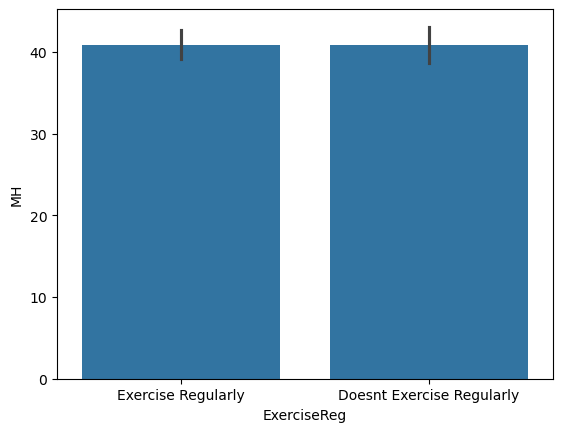

In [33]:
# Mental Health Score by Exercise status barchart
sns.barplot(x = 'ExerciseReg', y = 'MH', data = data, estimator = np.mean)
plt.show()

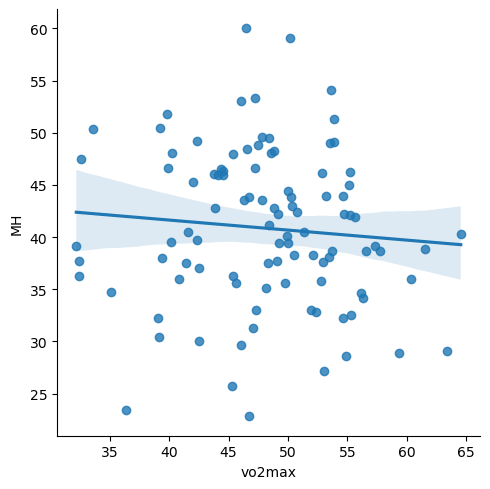

In [34]:
# visualizing correlation between mental health score and physical health score: scatter plot
sns.lmplot(x = 'vo2max', y = 'MH', data = data)

plt.show()


- the scatterplot above showed there's a weak negative linear relationship between mental health score and physical health score. Meaning that mental health score tends to reduce as physical health score increase and vice versa

## Inferential Analysis

### Research Question 1: Is there a difference in Mental Health Score between males and females?

In [215]:
#checking for normality
#H0: Sample is from a normal distributions.
#H1: Sample is not from a normal distributions.

from scipy.stats import shapiro

for group in data['Gender'].unique():
    subset = data[data['Gender'] == group]['MH']
    stat, p = shapiro(subset)
    print(f"{group} - Shapiro-Wilk Test: stat={stat:.3f}, p={p:.3f}")
    
    if p > 0.05:
        print("  ➤ Data appears to be normally distributed (fail to reject H0)\n")
    else:
        print("  ➤ Data does not appears to be  normally distributed (reject H0)\n")



Male - Shapiro-Wilk Test: stat=0.985, p=0.711
  ➤ Data appears to be normally distributed (fail to reject H0)

Female - Shapiro-Wilk Test: stat=0.973, p=0.358
  ➤ Data appears to be normally distributed (fail to reject H0)



Both groups/subset in the Gender column appears to be normaly distributed therefore, the parametric test for testing for difference between two groups will be used to test the hypothesis: independent T-test

#### H0: There's no difference in Mental Health Score between males and females
#### H1: There's difference in Mental Health Score between males and females

In [166]:
#T-test
from scipy.stats import ttest_ind

# Subset MH scores by gender
mh_male = data[data['Gender'] == 'Male']['MH']
mh_female = data[data['Gender'] == 'Female']['MH']

# Run the t-test
t_stat, p = ttest_ind(mh_male, mh_female, equal_var=True)  # or False if variances are unequal

print(f"T-test result: t-statistic = {t_stat:.3f}, p-value = {p:.3f}")

# Interpret the result
if p > 0.05:
    print("There's no significant difference in MH scores between males and females.")
else:
    print("There's significant difference in MH scores between males and females.")

T-test result: t-statistic = -8.707, p-value = 0.000
There's significant difference in MH scores between males and females.


### Research Question 2: Is there a difference in Physical Health Score across different BMI groups (Underweight, Normal, Overweight, Obese)?

The dataset doesn't currently have BMI and BMI groups variables. Therefore there's need for feature engineeing to create them

#### Feature Engineering

In [133]:
#create BMI
data['BMI'] = data['Weight'] / (data['Height'] * data['Height'])

# Check the result
data.head()

,ID,Gender,Height,Weight,MH,ExerciseReg,vo2max,BMI
0,18,Male,1.62,43.27,37.48,Exercise Regularly,48.33,16.487578
1,16,Male,1.62,43.72,32.86,Exercise Regularly,52.32,16.659046
2,57,Female,1.56,41.73,43.58,Exercise Regularly,46.31,17.147436
3,8,Male,1.62,47.28,38.65,Exercise Regularly,56.60,18.015546
4,61,Female,1.52,42.04,38.26,Exercise Regularly,52.08,18.195983


In [135]:
# Create BMI categories
bins = [0, 18.5, 24.9, 29.9, np.inf]  # Define the boundaries for the BMI groups
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']  # Define labels for each group

# Add a new column for BMI group
data['BMI_Group'] = pd.cut(data['BMI'], bins=bins, labels=labels, right=False)

# Check the result
data.head()

,ID,Gender,Height,Weight,MH,ExerciseReg,vo2max,BMI,BMI_Group
0,18,Male,1.62,43.27,37.48,Exercise Regularly,48.33,16.487578,Underweight
1,16,Male,1.62,43.72,32.86,Exercise Regularly,52.32,16.659046,Underweight
2,57,Female,1.56,41.73,43.58,Exercise Regularly,46.31,17.147436,Underweight
3,8,Male,1.62,47.28,38.65,Exercise Regularly,56.60,18.015546,Underweight
4,61,Female,1.52,42.04,38.26,Exercise Regularly,52.08,18.195983,Underweight


In [217]:
#check for normality
from scipy.stats import shapiro

for group in data['BMI_Group'].unique():
    subset = data[data['BMI_Group'] == group]['vo2max']
    
    stat, p = shapiro(subset)
    print(f"{group} - Shapiro-Wilk Test: stat={stat:.3f}, p={p:.3f}")
    
    if p > 0.05:
        print("  Data appear normally distributed (fail to reject H0)\n")
    else:
        print("  Data does not appear normally distributed (reject H0)\n")

Underweight - Shapiro-Wilk Test: stat=0.980, p=0.952
  Data appear normally distributed (fail to reject H0)

Normal - Shapiro-Wilk Test: stat=0.982, p=0.856
  Data appear normally distributed (fail to reject H0)

Overweight - Shapiro-Wilk Test: stat=0.979, p=0.792
  Data appear normally distributed (fail to reject H0)

Obese - Shapiro-Wilk Test: stat=0.975, p=0.635
  Data appear normally distributed (fail to reject H0)



All groups/subset in the BMI column appears to be normaly distributed therefore, the parametric test for testing for difference between more two groups will be used to test the hypothesis: One Way ANOVA

In [171]:
#One Way ANOVA

from scipy.stats import f_oneway

# Group the data by BMI groups
bmi_groups = [data[data['BMI_Group'] == group]['vo2max'] for group in data['BMI_Group'].unique()]

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(*bmi_groups)

# Print the results
print(f"ANOVA result: F-statistic = {f_stat:.3f}, p-value = {p_value:.3f}")

# Interpret the result
if p_value < 0.05:
    print("There is a significant difference in VO2Max across BMI groups.")
else:
    print("There is no significant difference in VO2Max across BMI groups.")


ANOVA result: F-statistic = 7.030, p-value = 0.000
There is a significant difference in VO2Max across BMI groups.


### Research Question 3: Is there a relationship between Mental Health and Physical Health scores?

In [179]:
#check for normality for mental health score
from scipy.stats import shapiro

stat, p = shapiro(data['MH'])
print(f"Shapiro-Wilk Test for MH: stat={stat:.3f}, p={p:.3f}")

if p > 0.05:
    print("Data appears normally distributed (fail to reject H0)")
else:
    print("Data does not appear normally distributed (reject H0)")


Shapiro-Wilk Test for MH: stat=0.994, p=0.932
Data appears normally distributed (fail to reject H0)


In [181]:
#check for normality for physical health score
from scipy.stats import shapiro

stat, p = shapiro(data['vo2max'])
print(f"Shapiro-Wilk Test for physical health score: stat={stat:.3f}, p={p:.3f}")

if p > 0.05:
    print("Data appears normally distributed (fail to reject H0)")
else:
    print("Data does not appear normally distributed (reject H0)")


Shapiro-Wilk Test for physical health score: stat=0.985, p=0.310
Data appears normally distributed (fail to reject H0)


In [186]:
from scipy.stats import zscore

# Calculate Z-scores
data['MH_z'] = zscore(data['MH'])
data['vo2max_z'] = zscore(data['vo2max'])

# Define a threshold (commonly 3)
threshold = 3

# Filter potential outliers
outliers = data[(data['MH_z'].abs() > threshold) | (data['vo2max_z'].abs() > threshold)]
print("Outliers based on Z-score method:")
print(outliers[['MH', 'MH_z', 'vo2max', 'vo2max_z']])

Outliers based on Z-score method:
Empty DataFrame
Columns: [MH, MH_z, vo2max, vo2max_z]
Index: []


Both variables are normaly distributed, and both  doesn't have outliers therefore pearson's correlation can be used to check for the relationship between the two variables 

In [197]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
corr, p_value = pearsonr(data['MH'], data['vo2max'])

# Print results
print(f"Pearson correlation: r = {corr:.3f}, p-value = {p_value:.3f}")


Pearson correlation: r = -0.089, p-value = 0.378


r = -0.089 means there's a weak negative correlation between mental health score and physical health score
p = 0.378 means the correlation is not statistically significant.

Conclusion: There's a non significant weak negative correlation between mental health score and physical health score

### Research Question 4: Is there an association between Regular Exercise and Gender?

##### H0: There's no significant association between Regular exercise and Gneder
##### H1: There's significant association between Regular exercise and Gneder

In [212]:
from scipy.stats import chi2_contingency

# Create the contingency table for Regular Exercise vs Gender
contingency_table = pd.crosstab(data['ExerciseReg'], data['Gender'])
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"\nChi-square test statistic = {chi2_stat:.3f}")
print(f"p-value = {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print(" There is a significant association between Regular Exercise and Gender (reject H0).")
else:
    print(" There is no significant association between Regular Exercise and Gender (fail to reject H0).")


Contingency Table:
Gender                     Female  Male
ExerciseReg                            
Doesnt Exercise Regularly      28    23
Exercise Regularly             18    31

Chi-square test statistic = 2.629
p-value = 0.105
 There is no significant association between Regular Exercise and Gender (fail to reject H0).
